In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv("/content/product_info.csv")

- **product_id**: The unique identifier for the product from the site
- **product_name**: The full name of the product
- **brand_id**: The unique identifier for the product brand from the site
- **brand_name**: The full name of the product brand
- **loves_count**: The number of people who have marked this product as a favorite
- **rating**: The average rating of the product based on user reviews
- **reviews**: The number of user reviews for the product
- **size**: The size of the product, which may be in oz, ml, g, packs, or other units depending on the product type
- **variation_type**: The type of variation parameter for the product (e.g. Size, Color)
- **variation_value**: The specific value of the variation parameter for the product (e.g. 100 mL, Golden Sand)
- **variation_desc**: A description of the variation parameter for the product (e.g. tone for fairest skin)
- **ingredients**: A list of ingredients included in the product, for example: [‘Product variation 1:’, ‘Water, Glycerin’, ‘Product variation 2:’, ‘Talc, Mica’] or if no variations [‘Water, Glycerin’]
- **price_usd**: The price of the product in US dollars
- **value_price_usd**: The potential cost savings of the product, presented on the site next to the regular price
- **sale_price_usd**: The sale price of the product in US dollars
- **limited_edition**: Indicates whether the product is a limited edition or not (1-true, 0-false)
- **new**: Indicates whether the product is new or not (1-true, 0-false)
- **online_only**: Indicates whether the product is only sold online or not (1-true, 0-false)
- **out_of_stock**: Indicates whether the product is currently out of stock or not (1 if true, 0 if false)
- **sephora_exclusive**: Indicates whether the product is exclusive to Sephora or not (1 if true, 0 if false)
- **highlights**: A list of tags or features that highlight the product's attributes (e.g. [‘Vegan’, ‘Matte Finish’])
- **primary_category**: First category in the breadcrumb section
- **secondary_category**: Second category in the breadcrumb section
- **tertiary_category**: Third category in the breadcrumb section
- **child_count**: The number of variations of the product available
- **child_max_price**: The highest price among the variations of the product
- **child_min_price**: The lowest price among the variations of the product


In [8]:
df.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [9]:
df.brand_id=df.brand_id.astype(str)

In [10]:
df.describe()

,loves_count,rating,reviews,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,child_count,child_max_price,child_min_price
count,8.494000e+03,8216.000000,8216.000000,8494.000000,451.000000,270.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,2754.000000,2754.000000
mean,2.917957e+04,4.194513,448.545521,51.655595,91.168537,20.207889,0.070285,0.071698,0.219096,0.073699,0.279374,1.631622,53.792023,39.665802
std,6.609212e+04,0.516694,1101.982529,53.669234,79.195631,24.327352,0.255642,0.258002,0.413658,0.261296,0.448718,5.379470,58.765894,38.685720
min,0.000000e+00,1.000000,1.000000,3.000000,0.000000,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
25%,3.758000e+03,3.981725,26.000000,25.000000,45.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,19.000000
50%,9.880000e+03,4.289350,122.000000,35.000000,67.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,28.000000
75%,2.684125e+04,4.530525,418.000000,58.000000,108.500000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59.000000,42.000000
max,1.401068e+06,5.000000,21281.000000,1900.000000,617.000000,320.000000,1.000000,1.000000,1.000000,1.000000,1.000000,105.000000,570.000000,400.000000


In [11]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).round().sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]
percentageOfnull(df)

,Null Count,Null Percentage,DataTypes
sale_price_usd,8224,97.0,float64
value_price_usd,8043,95.0,float64
variation_desc,7244,85.0,object
child_max_price,5740,68.0,float64
child_min_price,5740,68.0,float64
highlights,2207,26.0,object
size,1631,19.0,object
variation_value,1598,19.0,object
variation_type,1444,17.0,object
tertiary_category,990,12.0,object


In [17]:
null_rows = df[df['rating'].isnull() | df['reviews'].isnull() | df['secondary_category'].isnull()]
df.drop(null_rows.index, inplace=True)

In [18]:
columns_to_drop = ['sale_price_usd', 'value_price_usd', 'variation_desc', 'child_max_price', 'child_min_price']
df.drop(columns=columns_to_drop, inplace=True)

In [19]:
dup = df.duplicated().sum()
print('Number of duplicated records:', dup)

Number of duplicated records: 0


## Categorias Principales

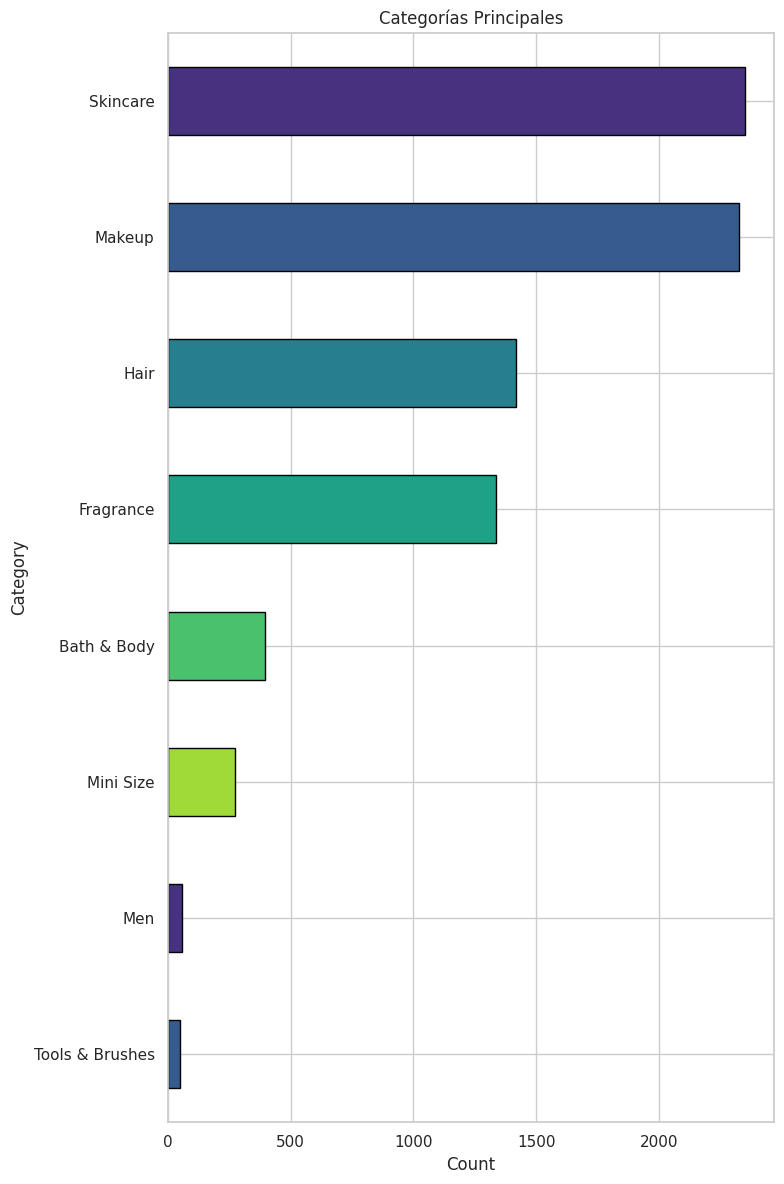

In [23]:
import seaborn as sns

sns.set_palette('viridis')

plt.figure(figsize=(8, 12))  # Tamaño del gráfico

# Contar las ocurrencias y graficar como barras horizontales
df['primary_category'].value_counts().plot(kind='barh', color=sns.color_palette('viridis'), edgecolor='black')

plt.title('Categorías Principales')  # Título del gráfico
plt.xlabel('Count')  # Etiqueta del eje x
plt.ylabel('Category')  # Etiqueta del eje y
plt.gca().invert_yaxis()  # Invertir el eje y para que las categorías más altas estén arriba
plt.tight_layout()  # Ajustar el diseño
plt.show()

## Relación Producto Favorito y Rating

In [ ]:
df.loves_count.value_counts()

loves_count
0         38
4679       5
1177       4
1695       4
1333       4
          ..
72173      1
76226      1
120381     1
118258     1
1475       1
Name: count, Length: 7291, dtype: int64

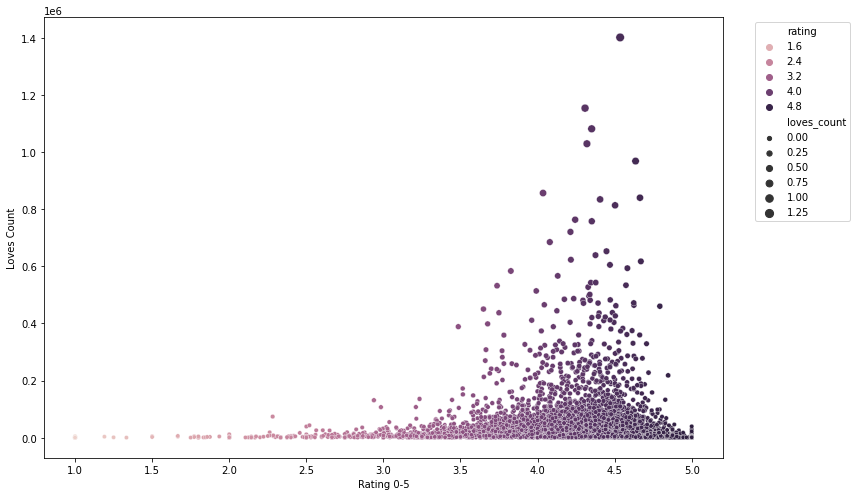

In [ ]:
plt.figure(figsize=(12, 7))

sns.scatterplot(x='rating', y='loves_count', data=df, size='loves_count', hue='rating', legend=True)

plt.xlabel('Rating 0-5')
plt.ylabel('Loves Count')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.show()

A medida que el rating aumenta, el "Loves Count" también tiende a aumentar. Existe una tendencia ascendente clara: los productos con ratings más altos tienden a ser agregados a favoritos con mayor frecuencia. Esto sugiere una correlación positiva entre el rating de un producto y cuántas veces es agregado a favoritos.

In [ ]:
correlation = df['rating'].corr(df['loves_count'])
print(f"Correlation between rating and loves_count: {correlation}")

Correlation between rating and loves_count: 0.041985216896216516


In [ ]:
from scipy.stats import pearsonr

# Calcular la correlación y el p-valor
correlation, p_value = pearsonr(df['rating'], df['loves_count'])

print(f"Correlation between rating and loves_count: {correlation}")
print(f"P-value: {p_value}")

# Interpretar el resultado del test de significancia
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("La correlación es estadísticamente significativa.")
else:
    print("No hay suficiente evidencia para concluir que la correlación es significativa.")


Correlation between rating and loves_count: 0.041985216896216475
P-value: 0.0001417426700271605
La correlación es estadísticamente significativa.


Un p-valor bajo (generalmente menor que 0.05) indica que la probabilidad de que la correlación observada haya ocurrido por azar es muy baja. En este caso, el p-valor es mucho menor que el nivel establecido.
Por lo tanto, la correlación es estadísticamente significativa.
Esto significa que, aunque la correlación es muy débil, hay suficiente evidencia estadística para afirmar que existe una relación entre el "rating" y el "loves_count", y que esta relación no es debida al azar.

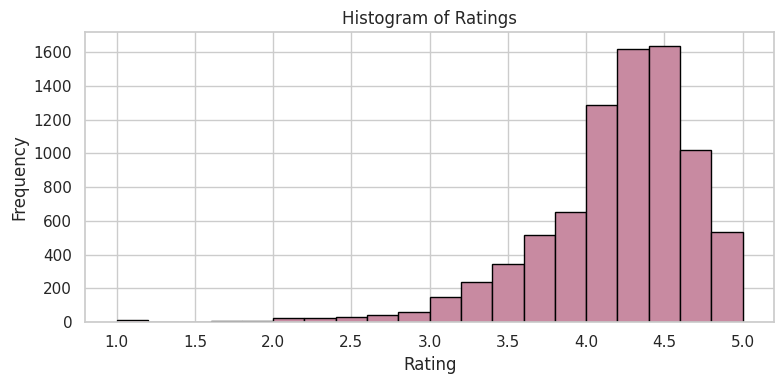

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

# Crear el histograma de rating
plt.hist(df['rating'], bins=20, color=('#c88aa1'), edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Mostrar el histograma
plt.grid(True)
plt.tight_layout()
plt.show()


In [44]:
df['rating'].mean()

4.194259593129492

## Nuevos productos excllusivos de Sephora

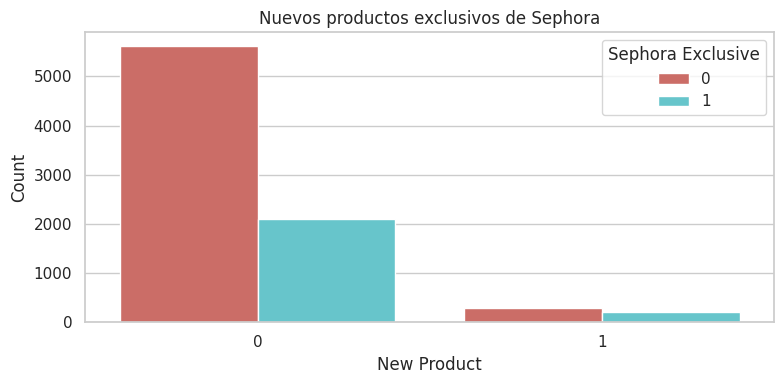

In [71]:
# Count plot de productos nuevos y exclusivos de Sephora
plt.figure(figsize=(8, 4))
sns.countplot(x='new', hue='sephora_exclusive', data=df,palette='hls')
plt.xlabel('New Product')
plt.ylabel('Count')
plt.title('Nuevos productos exclusivos de Sephora')
plt.legend(title='Sephora Exclusive', loc='upper right')
plt.tight_layout()
plt.show()



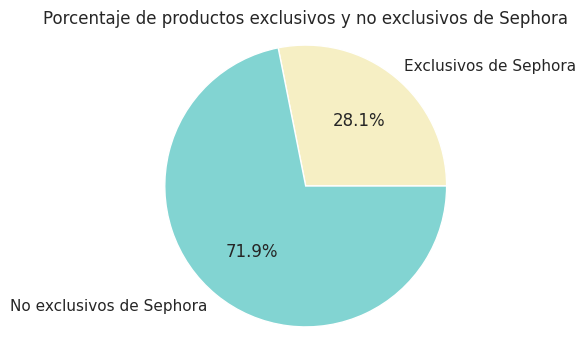

In [51]:
import matplotlib.pyplot as plt

# Calcular el conteo de productos exclusivos y no exclusivos
count_exclusive = df[df['sephora_exclusive'] == True].shape[0]
count_not_exclusive = df[df['sephora_exclusive'] == False].shape[0]

# Calcular porcentajes
total_products = len(df)
percent_exclusive = (count_exclusive / total_products) * 100
percent_not_exclusive = (count_not_exclusive / total_products) * 100

# Etiquetas y valores para el gráfico de torta
labels = ['Exclusivos de Sephora', 'No exclusivos de Sephora']
sizes = [percent_exclusive, percent_not_exclusive]
colors = ['#F6EFC4','#82D4D2']  # Colores para cada categoría

# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de productos exclusivos y no exclusivos de Sephora')
plt.axis('equal')  # Hace que el gráfico de torta sea un círculo
plt.show()


## Productos Excluisivos online

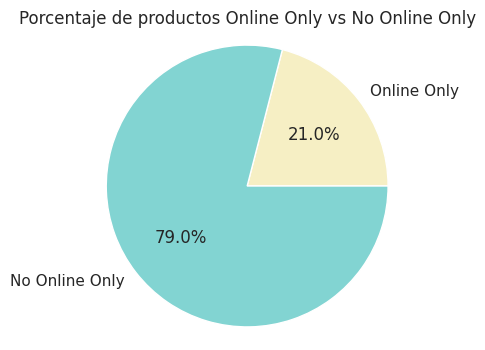

In [53]:
import matplotlib.pyplot as plt

# Calcular el conteo de productos online only y no online only
count_online_only = df[df['online_only'] == True].shape[0]
count_not_online_only = df[df['online_only'] == False].shape[0]

# Calcular porcentajes
total_products = len(df)
percent_online_only = (count_online_only / total_products) * 100
percent_not_online_only = (count_not_online_only / total_products) * 100

# Etiquetas y valores para el gráfico de torta
labels = ['Online Only', 'No Online Only']
sizes = [percent_online_only, percent_not_online_only]
colors = ['#F6EFC4','#82D4D2']  # Colores para cada categoría

# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de productos Online Only vs No Online Only')
plt.axis('equal')  # Hace que el gráfico de torta sea un círculo
plt.show()


In [56]:
# Filtrar productos exclusivamente online y obtener nombre del producto y marca
productos_exclusivos_online = df[df['online_only'] == True].head(5)[['product_name', 'brand_name']]

# Mostrar los nombres de los productos y marcas
print("Ejemplos de productos exclusivamente online:")
for index, row in productos_exclusivos_online.iterrows():
    print(f"{row['product_name']} - {row['brand_name']}")



Ejemplos de productos exclusivamente online:
Fragrance Discovery Set - 19-69
La Habana Eau de Parfum - 19-69
Rainbow Bar Eau de Parfum - 19-69
Kasbah Eau de Parfum - 19-69
Purple Haze Eau de Parfum - 19-69


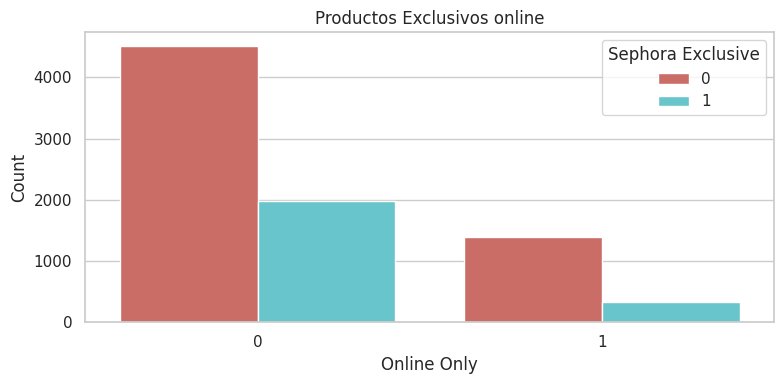

In [72]:
plt.figure(figsize=(8, 4))
sns.countplot(x='online_only', hue='sephora_exclusive', data=df, palette='hls')
plt.xlabel('Online Only')
plt.ylabel('Count')
plt.title('Productos Exclusivos online')
plt.legend(title='Sephora Exclusive', loc='upper right')
plt.tight_layout()
plt.show()

## Ingredientes

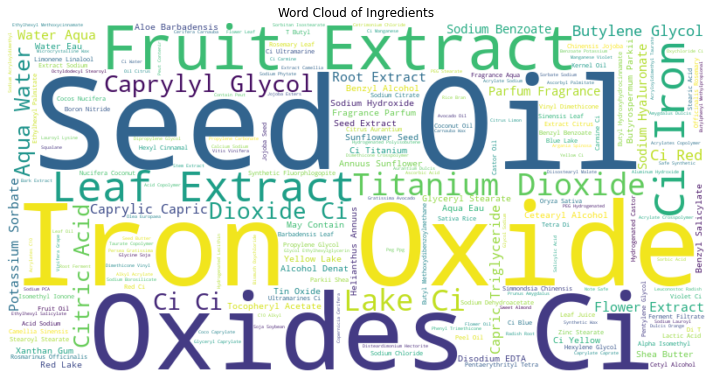

In [ ]:
from wordcloud import WordCloud

ingredients_text = ' '.join(df['ingredients'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Ingredients')
plt.tight_layout()
plt.show()

Los ocho ingredientes más repetidos en la nube de palabras son:

Aceite de Semilla (Seed Oil)

Óxidos de Hierro (Iron Oxides)

Extracto de Hoja (Leaf Extract)

Dióxido de Titanio (Titanium Dioxide)

Extracto de Fruta (Fruit Extract)

Agua (Aqua Water)

Ci

Caprilil Glicol (Caprylyl Glycol)




## Analisis de Precios y Rating de marcas de Lujo

In [30]:
# Ordenar los productos por precio de forma descendente y tomar los primeros 10
top_10_caros = df.nlargest(10, 'price_usd')[['product_name','brand_name', 'price_usd']]

# Mostrar los resultados como tabla usando pandas
print("Top 10 Productos Más Caros:")
print(top_10_caros.to_string(index=False))


Top 10 Productos Más Caros:
                                                    product_name                brand_name  price_usd
                       Shani Darden by Déesse PRO LED Light Mask    Shani Darden Skin Care     1900.0
                                    DRx SpectraLite BodyWare Pro Dr. Dennis Gross Skincare      465.0
                        Touch Home Permanent Hair Removal Device                 iluminage      449.0
                Trinity + Eye and Lip Enhancer Attachment Bundle                    NuFACE      449.0
Trinity Facial Toning Device + Wrinkle Reducer Attachment Bundle                    NuFACE      449.0
                Trinity + Eye and Lip Enhancer Attachment Bundle                    NuFACE      429.0
Trinity Facial Toning Device + Wrinkle Reducer Attachment Bundle                    NuFACE      429.0
                                           The Concentrate Serum                    La Mer      425.0
                                          The Regenera

In [32]:
# Ordenar los productos por precio de forma descendente y tomar los primeros 10
top_10_baratos = df.nsmallest(10, 'price_usd')[['product_name','brand_name', 'price_usd']]

# Mostrar los resultados como tabla usando pandas
print("Top 10 Productos Más Baratos:")
print(top_10_baratos.to_string(index=False))

Top 10 Productos Más Baratos:
                                   product_name         brand_name  price_usd
                  Cleansing & Exfoliating Wipes SEPHORA COLLECTION        3.0
                           Organic Cotton Swabs SEPHORA COLLECTION        3.0
                      Clean Charcoal Nose Strip SEPHORA COLLECTION        3.0
Mini Clean Cleansing & Gentle Exfoliating Wipes SEPHORA COLLECTION        3.0
           Mini Cleansing Wipes - Coconut Water SEPHORA COLLECTION        3.0
                           Bath Bomb Bath Fizzy SEPHORA COLLECTION        3.0
                                 Clean Eye Mask SEPHORA COLLECTION        3.5
                                 Hand Sanitizer SEPHORA COLLECTION        3.5
                              Vitamin Eye Masks SEPHORA COLLECTION        3.5
         Artist Color Refillable Makeup Palette   MAKE UP FOR EVER        4.0


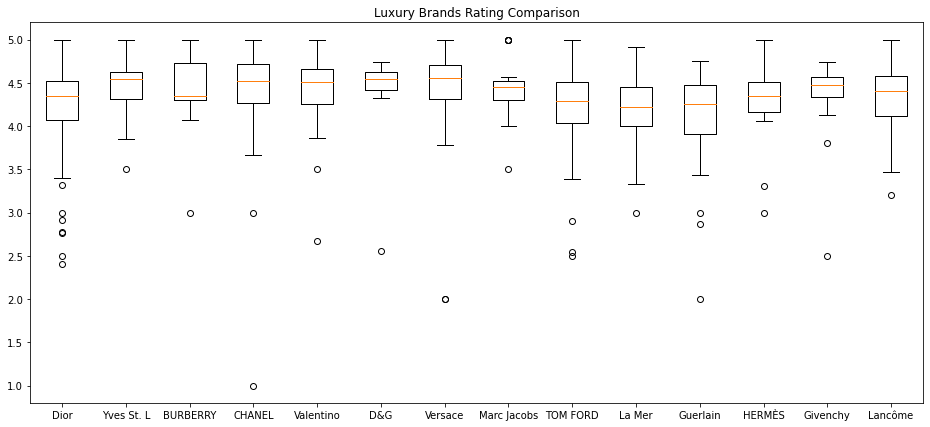

In [ ]:
dr = df.query('brand_name == "Dior"')
ysl = df.query('brand_name == "Yves Saint Laurent"')
br = df.query('brand_name == "BURBERRY"')
ch = df.query('brand_name == "CHANEL"')
vt = df.query('brand_name == "Valentino"')
dg = df.query('brand_name == "Dolce&Gabbana"')
vs = df.query('brand_name == "Versace"')
mj = df.query('brand_name == "Marc Jacobs Fragrances"')
tf = df.query('brand_name == "TOM FORD"')
lm = df.query('brand_name == "La Mer"')
gr = df.query('brand_name == "GUERLAIN"')
hm = df.query('brand_name == "HERMÈS"')
gv = df.query('brand_name == "Givenchy"')
lc = df.query('brand_name == "Lancôme"')


chanel = ch['rating'].dropna()
dior = dr['rating'].dropna()
ystl = ysl['rating'].dropna()
burrberry = br['rating'].dropna()
valentino = vt['rating'].dropna()
versace = vs['rating'].dropna()
dgb = dg['rating'].dropna()
mjb = mj['rating'].dropna()
tomford = tf['rating'].dropna()
guerlain = gr['rating'].dropna()
lamer = lm['rating'].dropna()
hermes = hm['rating'].dropna()
givenchy = gv['rating'].dropna()
lancome = lc['rating'].dropna()


labels = ['Dior', 'Yves St. L', 'BURBERRY', 'CHANEL', 'Valentino', 'D&G', 'Versace', 'Marc Jacobs', 'TOM FORD', 'La Mer', 'Guerlain', 'HERMÈS', 'Givenchy', 'Lancôme']

plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Rating Comparison')
plt.boxplot([dior, ystl, burrberry, chanel, valentino, dgb, versace, mjb, tomford, lamer, guerlain, hermes, givenchy, lancome], labels=labels)


plt.show()

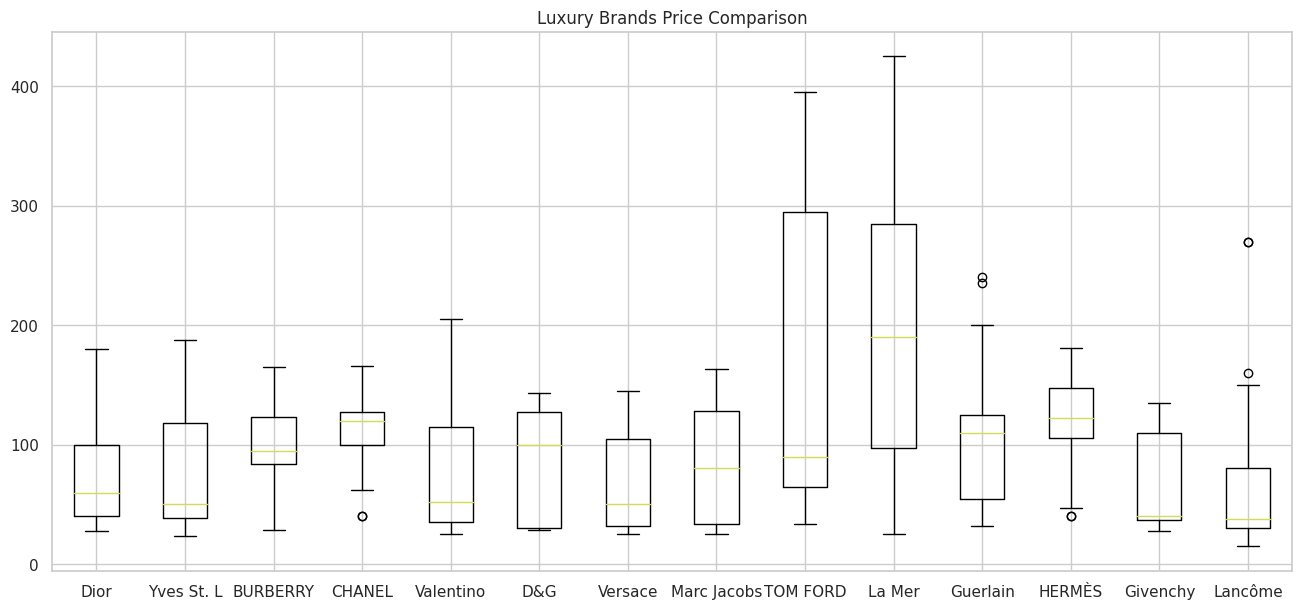

In [76]:
import matplotlib.pyplot as plt

# Filtra el DataFrame por marcas específicas
dr = df.query('brand_name == "Dior"')
ysl = df.query('brand_name == "Yves Saint Laurent"')
br = df.query('brand_name == "BURBERRY"')
ch = df.query('brand_name == "CHANEL"')
vt = df.query('brand_name == "Valentino"')
dg = df.query('brand_name == "Dolce&Gabbana"')
vs = df.query('brand_name == "Versace"')
mj = df.query('brand_name == "Marc Jacobs Fragrances"')
tf = df.query('brand_name == "TOM FORD"')
lm = df.query('brand_name == "La Mer"')
gr = df.query('brand_name == "GUERLAIN"')
hm = df.query('brand_name == "HERMÈS"')
gv = df.query('brand_name == "Givenchy"')
lc = df.query('brand_name == "Lancôme"')

# Extrae y limpia los precios en USD de cada marca
chanel = ch['price_usd'].dropna()
dior = dr['price_usd'].dropna()
ystl = ysl['price_usd'].dropna()
burrberry = br['price_usd'].dropna()
valentino = vt['price_usd'].dropna()
versace = vs['price_usd'].dropna()
dgb = dg['price_usd'].dropna()
mjb = mj['price_usd'].dropna()
tomford = tf['price_usd'].dropna()
guerlain = gr['price_usd'].dropna()
lamer = lm['price_usd'].dropna()
hermes = hm['price_usd'].dropna()
givenchy = gv['price_usd'].dropna()
lancome = lc['price_usd'].dropna()

# Define las etiquetas para el gráfico
labels = ['Dior', 'Yves St. L', 'BURBERRY', 'CHANEL', 'Valentino', 'D&G', 'Versace', 'Marc Jacobs', 'TOM FORD', 'La Mer', 'Guerlain', 'HERMÈS', 'Givenchy', 'Lancôme']

# Genera el gráfico de caja y bigotes
plt.figure(figsize=(16, 7))
plt.title('Luxury Brands Price Comparison')
plt.boxplot([dior, ystl, burrberry, chanel, valentino, dgb, versace, mjb, tomford, lamer, guerlain, hermes, givenchy, lancome], labels=labels)

# Muestra el gráfico
plt.show()


La Mer y TOM FORD: Son las marcas con los precios más altos en promedio. La Mer, en particular, tiene una amplia variación en sus precios, lo que sugiere una gama de productos con diferentes niveles de precios.

CHANEL y HERMÈS: También son marcas con precios relativamente altos. CHANEL tiene una menor variación en los precios en comparación con HERMÈS.

GUERLAIN, BURBERRY, y Dolce&Gabbana: Tienen precios medios-altos. GUERLAIN muestra algunos valores atípicos (outliers) que pueden ser productos particularmente caros.

Yves Saint Laurent, Valentino, Marc Jacobs Fragrances, Dior y Versace: Estas marcas tienden a tener precios moderados. Yves Saint Laurent tiene una mayor dispersión de precios, lo que sugiere una variedad en la gama de productos.

Lancôme y Givenchy: Son las marcas con los precios más bajos en comparación con las demás marcas del gráfico. Lancôme tiene una menor dispersión en sus precios, mientras que Givenchy muestra algunos outliers hacia el extremo superior.

In [77]:
# Filtra el DataFrame por marcas específicas
dr = df.query('brand_name == "Dior"')
ysl = df.query('brand_name == "Yves Saint Laurent"')
br = df.query('brand_name == "BURBERRY"')
ch = df.query('brand_name == "CHANEL"')
vt = df.query('brand_name == "Valentino"')
dg = df.query('brand_name == "Dolce&Gabbana"')
vs = df.query('brand_name == "Versace"')
mj = df.query('brand_name == "Marc Jacobs Fragrances"')
tf = df.query('brand_name == "TOM FORD"')
lm = df.query('brand_name == "La Mer"')
gr = df.query('brand_name == "GUERLAIN"')
hm = df.query('brand_name == "HERMÈS"')
gv = df.query('brand_name == "Givenchy"')
lc = df.query('brand_name == "Lancôme"')

# Calcula el precio promedio de cada marca
average_prices = {
    'Dior': dr['price_usd'].dropna().mean(),
    'Yves Saint Laurent': ysl['price_usd'].dropna().mean(),
    'BURBERRY': br['price_usd'].dropna().mean(),
    'CHANEL': ch['price_usd'].dropna().mean(),
    'Valentino': vt['price_usd'].dropna().mean(),
    'Dolce&Gabbana': dg['price_usd'].dropna().mean(),
    'Versace': vs['price_usd'].dropna().mean(),
    'Marc Jacobs Fragrances': mj['price_usd'].dropna().mean(),
    'TOM FORD': tf['price_usd'].dropna().mean(),
    'La Mer': lm['price_usd'].dropna().mean(),
    'GUERLAIN': gr['price_usd'].dropna().mean(),
    'HERMÈS': hm['price_usd'].dropna().mean(),
    'Givenchy': gv['price_usd'].dropna().mean(),
    'Lancôme': lc['price_usd'].dropna().mean()
}

# Muestra la lista de precios promedio
for brand, price in average_prices.items():
    print(f'{brand}: ${price:.2f}')


Dior: $72.52
Yves Saint Laurent: $78.32
BURBERRY: $97.52
CHANEL: $112.14
Valentino: $79.10
Dolce&Gabbana: $85.05
Versace: $66.54
Marc Jacobs Fragrances: $81.50
TOM FORD: $158.87
La Mer: $197.95
GUERLAIN: $99.56
HERMÈS: $117.03
Givenchy: $67.51
Lancôme: $62.18


# Stocks

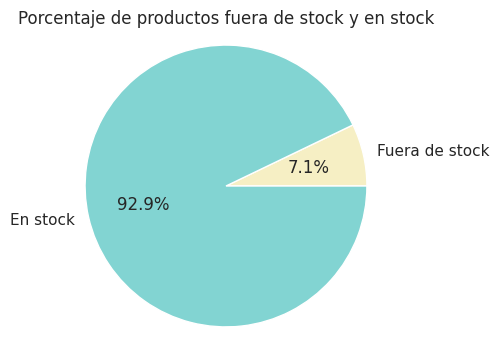

In [78]:
# Calcular el conteo de productos out_of_stock y en stock
count_out_of_stock = df[df['out_of_stock'] == True].shape[0]
count_in_stock = df[df['out_of_stock'] == False].shape[0]

# Calcular porcentajes
total_products = len(df)
percent_out_of_stock = (count_out_of_stock / total_products) * 100
percent_in_stock = (count_in_stock / total_products) * 100

# Etiquetas y valores para el gráfico de torta
labels = ['Fuera de stock', 'En stock']
sizes = [percent_out_of_stock, percent_in_stock]
colors = ['#F6EFC4', '#82D4D2']  # Colores para cada categoría

# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Porcentaje de productos fuera de stock y en stock')
plt.axis('equal')  # Hace que el gráfico de torta sea un círculo
plt.show()


In [81]:
products_out_of_stock = df[df['out_of_stock'] == True]['product_name'].tolist()

# Mostrar los IDs de productos fuera de stock
print("Productos fuera de stock:")
print(products_out_of_stock)


Productos fuera de stock:
['African Beauty Butter Mini Gift Set', 'Mini AFRICAN Beauty Butter- Intensive Dry Skin Treatment', 'ABBOTT Sampler Set', 'The Cape Perfume Travel Spray', 'Magnolia Nobile', 'Mini Baomint Deluxe Travel Kit', 'Mini Aegea Blossom Eau de Parfum Travel Spray', 'Aegea Blossom Eau de Parfum', 'GENIUS Ultimate Anti-Aging Melting Cleanser', 'Regenerative Anti-Aging Moisturizer', 'Peel and Plump Skin-Smoothing Duo', 'CAVIAR Anti-Aging Clinical Densifying Shampoo', 'CAVIAR Anti-Aging Restructuring Bond Repair Leave-In Overnight Serum', 'CAVIAR Anti-Aging Restructuring Bond Repair Leave-In Protein Cream', 'Alterna Haircare Caviar Anti-Aging Clinical Densifying Foam Conditioner', 'CAVIAR Anti-Aging Restructuring Bond Repair Shampoo', 'Good Vibes Only + Hydration + Repair Hair Mask Set', 'Mini Un.Done Volume and Matte Texture Spray', 'Vault Sulfate Free Shampoo for Color-Treated Hair', 'Hydro Rush and Dream Routine Hair Hydration Set', 'Vault Conditioner for Color-Treated 